## Warwick Quant Society - Understanding Core Python Libraries

In this workshop, we try using the following versatile Python libraries in a financial perspective:

- numpy
- pandas
- matplotlib.pyplot
- yfinance


In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.interpolate import make_interp_spline, BSpline

                                 Open       Close         Low        High  \
2024-12-10 00:00:00-05:00  246.618841  247.497879  245.070540  247.937398   
2024-12-11 00:00:00-05:00  247.687671  246.219284  245.989526  250.524548   
2024-12-12 00:00:00-05:00  246.618851  247.687683  245.410173  248.466825   
2024-12-13 00:00:00-05:00  247.547826  247.857483  245.969559  249.016197   
2024-12-16 00:00:00-05:00  247.717644  250.764282  247.378006  251.103920   
2024-12-17 00:00:00-05:00  249.805339  253.201599  249.505666  253.551221   
2024-12-18 00:00:00-05:00  251.883059  247.777573  247.467916  254.000726   
2024-12-19 00:00:00-05:00  247.228177  249.515656  246.818624  251.723235   
2024-12-20 00:00:00-05:00  247.767582  254.210510  245.420172  254.719945   
2024-12-23 00:00:00-05:00  254.490204  254.989655  253.171646  255.369227   
2024-12-24 00:00:00-05:00  255.209412  257.916443  255.009620  257.926411   
2024-12-26 00:00:00-05:00  257.906429  258.735504  257.347047  259.814335   

/var/folders/8n/c_5ym1k94lv3w27dnnhgkddh0000gn/T/ipykernel_78100/2698711120.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data['MA3'] = stock_data['MA3'][2:].append(pd.Series([250,250]))
/var/folders/8n/c_5ym1k94lv3w27dnnhgkddh0000gn/T/ipykernel_78100/2698711120.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data['MA5'] = stock_data['MA5'][4:].append(pd.Series([250,250, 245, 240]))


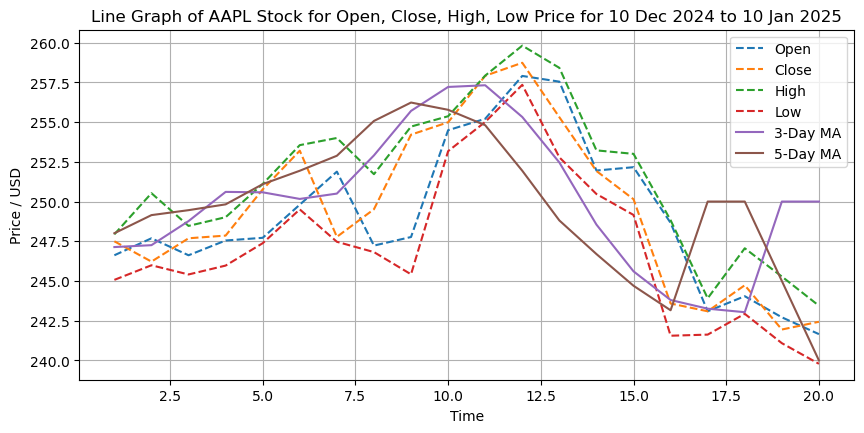

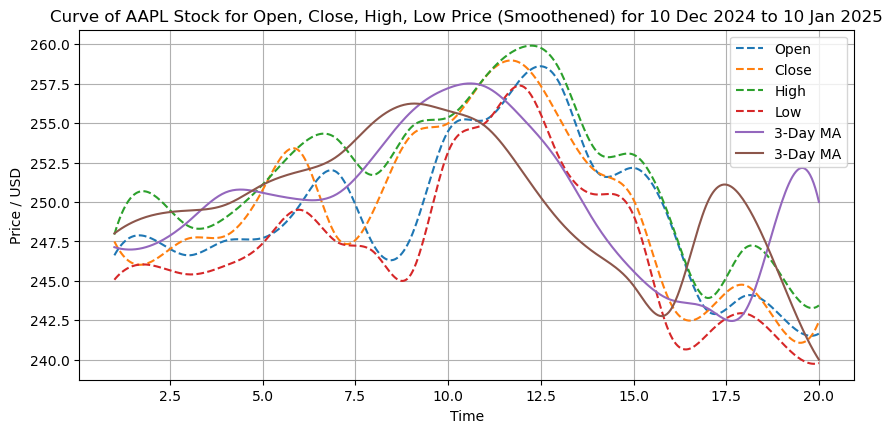

In [15]:
stock = 'AAPL'

start_date = '2024-12-10'
end_date = '2025-01-10'

properties = ['Open', 'Close', 'Low', 'High']

stock_data = {}

for Property in properties:
    ticker = yf.Ticker(stock)
    stock_data[Property] = ticker.history(start = start_date, end = end_date)[Property]

open_stock = stock_data["Open"]
close_stock = stock_data["Close"]
high_stock = stock_data["High"]
low_stock = stock_data["Low"]
stock_data['MA3'] = stock_data['Close'].rolling(window=3).mean()
stock_data['MA3'] = stock_data['MA3'][2:].append(pd.Series([250,250]))
stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA5'] = stock_data['MA5'][4:].append(pd.Series([250,250, 245, 240]))

stock_df = pd.DataFrame(stock_data)

print(stock_df)

time = np.linspace(1, open_stock.size, open_stock.size)

#define x as 200 equally spaced values between the min and max of original x 
tnew = np.linspace(time.min(), time.max(), 400) 

#define spline
splo = make_interp_spline(time, open_stock, k=3)
splc = make_interp_spline(time, close_stock, k=3)
splh = make_interp_spline(time, high_stock, k=3)
spll = make_interp_spline(time, low_stock, k=3)
spl3 = make_interp_spline(time, stock_data['MA3'], k=3)
spl5 = make_interp_spline(time, stock_data['MA5'], k=3)
o_smooth = splo(tnew)
c_smooth = splc(tnew)
h_smooth = splh(tnew)
l_smooth = spll(tnew)
ma3_smooth = spl3(tnew)
ma5_smooth = spl5(tnew)

plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
plt.plot(time, open_stock, '--', label = "Open")
plt.plot(time, close_stock, '--',label = "Close")
plt.plot(time, high_stock, '--',label = "High")
plt.plot(time, low_stock, '--',label = "Low")
plt.plot(time, stock_data['MA3'], label = "3-Day MA")
plt.plot(time, stock_data['MA5'], label = "5-Day MA")
plt.title("Line Graph of AAPL Stock for Open, Close, High, Low Price for 10 Dec 2024 to 10 Jan 2025")
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(2, 1, 2)
plt.plot(tnew, o_smooth, '--',label = "Open")
plt.plot(tnew, c_smooth, '--',label = "Close")
plt.plot(tnew, h_smooth, '--',label = "High")
plt.plot(tnew, l_smooth, '--',label = "Low")
plt.plot(tnew, ma3_smooth, label = "3-Day MA")
plt.plot(tnew, ma5_smooth, label = "3-Day MA")
plt.title("Curve of AAPL Stock for Open, Close, High, Low Price (Smoothened) for 10 Dec 2024 to 10 Jan 2025")
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.legend()
plt.grid()
plt.show()

Date
2024-12-10 00:00:00-05:00    2.870010
2024-12-11 00:00:00-05:00    4.540009
2024-12-12 00:00:00-05:00    3.060013
2024-12-13 00:00:00-05:00    3.049988
2024-12-16 00:00:00-05:00    3.730011
2024-12-17 00:00:00-05:00    4.050003
2024-12-18 00:00:00-05:00    6.539993
2024-12-19 00:00:00-05:00    4.910004
2024-12-20 00:00:00-05:00    9.309998
2024-12-23 00:00:00-05:00    2.199997
2024-12-24 00:00:00-05:00    2.919998
2024-12-26 00:00:00-05:00    2.470001
2024-12-27 00:00:00-05:00    5.640015
2024-12-30 00:00:00-05:00    2.750000
2024-12-31 00:00:00-05:00    3.850006
2025-01-02 00:00:00-05:00    7.279999
2025-01-03 00:00:00-05:00    2.289993
2025-01-06 00:00:00-05:00    4.130005
2025-01-07 00:00:00-05:00    4.199997
2025-01-08 00:00:00-05:00    3.660004
Name: Daily_Price_Range, dtype: float64


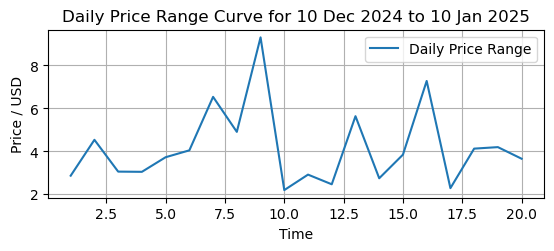

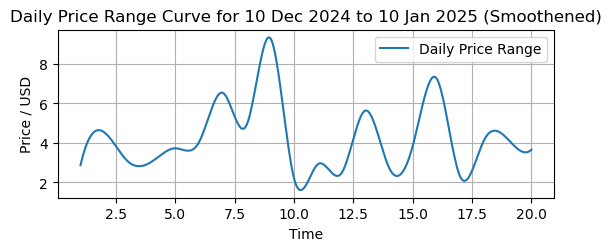

In [97]:
stock_df['Daily_Price_Range'] = stock_df['High'] - stock_df['Low']
print(stock_df['Daily_Price_Range'])

plt.subplot(2, 1, 1)
plt.plot(time, stock_df['Daily_Price_Range'], label = 'Daily Price Range')
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.title('Daily Price Range Curve for 10 Dec 2024 to 10 Jan 2025')
plt.legend()
plt.grid()
plt.show()


splr = make_interp_spline(time, stock_df['Daily_Price_Range'], k=3)
r_smooth = splr(tnew)

plt.subplot(2, 1, 2)
plt.plot(tnew, r_smooth, label = 'Daily Price Range')
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.title('Daily Price Range Curve for 10 Dec 2024 to 10 Jan 2025 (Smoothened)')
plt.grid()
plt.legend()
plt.show()

